<div style="background-color: #009688; color: #DAA520; padding: 10px; font-size: 25px; font-weight: bold; text-align: center; border-radius: 5px;">
    Import Libraries
</div>

In [1]:
import re  # Regular expressions for text processing
import string  # String operations, often used for text cleaning
import warnings  # To handle or suppress warnings

import numpy as np  # Numerical computations, working with arrays
import pandas as pd  # Data manipulation and analysis, especially with DataFrames
import matplotlib.pyplot as plt
import plotly.express as px# Plotting and visualization
import seaborn as sns  # Statistical data visualization built on top of Matplotlib

from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn.preprocessing import LabelEncoder  # Encoding categorical labels into numeric format
from sklearn.metrics import accuracy_score, confusion_matrix  # Performance metrics for model evaluation
from sklearn.feature_extraction.text import TfidfVectorizer  # Text to numerical feature vector using TF-IDF
from sklearn.feature_extraction.text import CountVectorizer  # Text to numerical feature vector using bag-of-words
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classification model

from wordcloud import WordCloud, STOPWORDS  # Generating word clouds for text data visualization

from nltk.corpus import stopwords  # NLTK's list of common stopwords for text processing
from nltk.stem import PorterStemmer  # Stemming words to their root form using Porter Stemmer

from tensorflow.keras.utils import to_categorical  # Utility for one-hot encoding
from tensorflow.keras.preprocessing.text import Tokenizer  # Tokenizing text into sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Padding sequences to the same length
from tensorflow.keras.layers import Dense, LSTM, Embedding  # Core Keras layers for building neural networks
from tensorflow.keras.models import Sequential  # Keras model for building neural networks sequentially
from tensorflow.keras.callbacks import EarlyStopping  # Callback for stopping training early if needed

import pickle  # Serializing and de-serializing Python objects


<div style="background-color: #009688; color: #DAA520; padding: 10px; font-size: 25px; font-weight: bold; text-align: center; border-radius: 5px;">
    Data Preparation 
</div>


In [2]:
df = pd.read_csv("Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.shape

(568454, 10)

<div style="background-color: #009688; color: #DAA520; padding: 10px; font-size: 25px; font-weight: bold; text-align: center; border-radius: 5px;">
    Data Cleaning
</div>


In [4]:
# Handling missing values
df.isnull().sum().to_frame(name="# of missing Values")

,# of missing Values
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


In [5]:
total_rows = df.shape[0]  # Store the total number of rows before removing null values
df.dropna(how="any", inplace=True)  # Drop rows with any null values and update the DataFrame
remaining_rows = df.shape[0]  # Store the total number of rows after removing null values

removed_rows = total_rows - remaining_rows  # Calculate the number of rows that were removed
print("NO. of rows removed :", removed_rows)  # Print the number of rows that were removed

# Calculate and print the percentage of data that was removed
print(f"\nPercentage of data removed: {np.round((removed_rows/total_rows)*100, 2)}%")
# Calculate and print the percentage of data that remains
print(f"Percentage of data remaining: {np.round((remaining_rows/total_rows)*100, 2)}%")


NO. of rows removed : 53

Percentage of data removed: 0.01%
Percentage of data remaining: 99.99%


In [6]:
# Removing duplicate rows
a = df.shape[0]
df.drop_duplicates(inplace=True, subset=["Score", "Text"])
b = df.shape[0]

print("No, of rows removed:", a-b)
print(f"\n Percentage of data removed: {np.round(((a-b)/total_rows)*100,2)}%")
print(f"Percentage of data remaining: {np.round((b/total_rows)*100,2)}%")

No, of rows removed: 174745

 Percentage of data removed: 30.74%
Percentage of data remaining: 69.25%


In [7]:
a = df.shape[0]  # Store the total number of rows before removing duplicates
df.drop_duplicates(inplace=True, subset=["Score", "Text"])  # Remove duplicate rows based on 'Score' and 'Text' columns
b = df.shape[0]  # Store the total number of rows after removing duplicates

print("No. of rows removed:", a - b)  # Print the number of rows that were removed

# Calculate and print the percentage of data that was removed based on the original total rows
print(f"\nPercentage of data removed: {np.round(((a - b) / total_rows) * 100, 2)}%")
# Calculate and print the percentage of data that remains based on the original total rows
print(f"Percentage of data remaining: {np.round((b / total_rows) * 100, 2)}%")


No. of rows removed: 0

Percentage of data removed: 0.0%
Percentage of data remaining: 69.25%


In [8]:
a = df.shape[0]  # Store the total number of rows before removing outliers

# Identify the indices of rows where 'HelpfulnessNumerator' is greater than 'HelpfulnessDenominator'
inx = df[df["HelpfulnessNumerator"] > df["HelpfulnessDenominator"]].index
df.drop(index=inx, inplace=True)  # Drop the rows identified as outliers based on the above condition

b = df.shape[0]  # Store the total number of rows after removing outliers
print("NO. of rows removed:", a - b)  # Print the number of rows that were removed

# Calculate and print the percentage of data that was removed based on the original total rows
print(f"\nPercentage of data removed: {np.round(((a - b) / total_rows) * 100, 2)}%")
# Calculate and print the percentage of data that remains based on the original total rows
print(f"Percentage of data remaining: {np.round((b / total_rows) * 100, 2)}%")


NO. of rows removed: 2

Percentage of data removed: 0.0%
Percentage of data remaining: 69.25%


In [9]:
# Define a function to categorize the 'Score' into 'Positive', 'Neutral', or 'Negative'
def create_target(x):
    return "Positive" if x > 3 else "Negative" if x < 3 else "Neutral"

# Apply the 'create_target' function to the 'Score' column and create a new 'target' column
df.loc[:, "target"] = df.Score.apply(create_target)


In [10]:
# target column
df[["Score", "target"]].sample(5)

,Score,target
205920,5,Positive
348723,5,Positive
64663,5,Positive
293403,5,Positive
57875,5,Positive


<div style="background-color: #009688; color: #DAA520; padding: 10px; font-size: 25px; font-weight: bold; text-align: center; border-radius: 5px;">
    Handling Class Imbalance
</div>


In [11]:
# Calculate the distribution of the 'target' column and reset the index to create a DataFrame
vc = df['target'].value_counts().reset_index()
vc.columns = ['target', 'count']  # Rename the columns for clarity

# Plot the distribution using Plotly's bar chart
fig = px.bar(vc, 
             x='count',  # Set the x-axis to show the count of each target label
             y='target',  # Set the y-axis to show the target labels
             orientation='h',  # Horizontal bar chart
             title='Label vs Count',  # Title of the plot
             labels={'count':'Count', 'target':'Target'},  # Labels for the axes
             text='count',  # Display the count value on each bar
             color='target',  # Color the bars based on the target label
             color_discrete_map={'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'})  # Assign specific colors to each target label

# Update layout for better readability and presentation
fig.update_layout(
    title_font_size=24,  # Set the font size for the title
    xaxis_title_font_size=18,  # Set the font size for the x-axis title
    yaxis_title_font_size=18,  # Set the font size for the y-axis title
    yaxis={'categoryorder':'total ascending'},  # Order the y-axis categories by count, ascending
    bargap=0.2,  # Set a gap between bars
    plot_bgcolor='rgba(0,0,0,0)'  # Set the plot background color to transparent
)

# Show the plot in the output
fig.show()


In [12]:
neutral = df.loc[df.target == "Neutral"]  # Select all rows where the target is "Neutral" (29,770 reviews)
positive = df.loc[df.target == "Positive"].sample(50000)  # Randomly sample 50,000 rows where the target is "Positive"
negative = df.loc[df.target == "Negative"].sample(50000)  # Randomly sample 50,000 rows where the target is "Negative"

# Concatenate the sampled positive, negative, and all neutral reviews into a new DataFrame
df = pd.concat([positive, negative, neutral])

df.shape  # Display the shape of the new DataFrame to check the number of rows and columns


(129770, 11)

In [13]:
# Calculate the distribution of the 'target' column and reset the index to create a DataFrame
vc = df['target'].value_counts().reset_index()
vc.columns = ['target', 'count']  # Rename the columns for clarity

# Create a horizontal bar plot using Plotly to visualize the distribution
fig = px.bar(
    vc,
    x='count',  # Set the x-axis to represent the count of each target label
    y='target',  # Set the y-axis to represent the target labels
    orientation='h',  # Specify a horizontal orientation for the bar chart
    title='Label vs Count',  # Title of the plot
    labels={'count': 'Count', 'target': 'Target'},  # Labels for the axes
    text='count',  # Display the count value on each bar
    color='target',  # Color the bars based on the target label
    color_discrete_map={'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}  # Assign specific colors to each target label
)

# Update the layout of the plot for enhanced readability
fig.update_layout(
    title_font_size=24,  # Set the font size for the plot title
    xaxis_title_font_size=18,  # Set the font size for the x-axis title
    yaxis_title_font_size=18,  # Set the font size for the y-axis title
    yaxis={'categoryorder': 'total ascending'},  # Order the y-axis categories by count in ascending order
    bargap=0.2,  # Set the gap between bars
    plot_bgcolor='rgba(0,0,0,0)'  # Set the plot background color to transparent
)

# Display the finalized plot
fig.show()


<div style="background-color: #009688; color: #DAA520; padding: 10px; font-size: 25px; font-weight: bold; text-align: center; border-radius: 5px;">
    Data Pre-processing
</div>


In [14]:
# Get the set of all English stopwords from the NLTK library
total_stopwords = set(stopwords.words("english"))

# Create a set of stopwords that contain "n't" or "no" (usually negative words)
negative_stop_words = set(word for word in total_stopwords 
                          if "n't" in word or 'no' in word)

# Remove the negative stopwords from the total stopwords to form the final stopwords set
final_stopwords = total_stopwords - negative_stop_words

# Add the word "one" to the final stopwords set (if it is not already included)
final_stopwords.add("one")

# Print the final set of stopwords
print(final_stopwords)


{'to', 't', 'doesn', 'such', 'your', 'only', 'during', 'weren', "that'll", 's', 'those', 've', "should've", 'by', "you'd", 'this', 'with', 'i', 'after', 'too', 'because', 'couldn', 'themselves', 'has', 'my', 'before', 'more', 'each', 'o', 'shan', 'd', 'hadn', 'then', 'doing', 'you', "you're", 'off', 'yours', 'me', 'out', 'on', 'she', 'herself', 'don', 'mightn', 'an', 'were', 'a', 'into', 'why', 'are', 'both', 'other', 'very', "you've", 'ain', 'one', 'be', 'under', 'wouldn', 'her', 'or', 'any', 'theirs', 'through', 'again', 'than', 'mustn', 'will', 'so', 'having', 'whom', 'him', 'did', 'against', 'yourself', 'have', 'if', 'further', 'how', 'was', 'most', 'its', 'should', 'didn', 'up', 'isn', 'am', 'do', 'once', 'what', 'his', "she's", 'that', 'our', 'in', 'below', 'm', 'myself', 'aren', 'shouldn', 'he', 'from', 'which', 'had', 'wasn', 'haven', 'about', 'at', 'where', 'and', 'itself', 'over', 'they', 'yourselves', 'between', 'their', 'is', "you'll", 'these', 'the', 'down', 'just', 'when'

In [15]:
# Initialize the Porter Stemmer object for stemming words (reducing words to their root form)
stemmer = PorterStemmer()

# ---------------------------------------------
# Regular expression pattern to identify HTML tags
HTMLTAGS = re.compile('<.*?>')

# Translation table to remove all punctuation from text
table = str.maketrans(dict.fromkeys(string.punctuation))

# Translation table to remove all digits from text
remove_digits = str.maketrans('', '', string.digits)

# Regular expression pattern to match multiple whitespace characters
MULTIPLE_WHITESPACE = re.compile(r"\s+")
# ---------------------------------------------


In [16]:
def preprocessor(review):
    # Remove HTML tags
    review = HTMLTAGS.sub(r'', review)

    # Remove punctuation using the translation table
    review = review.translate(table)
    
    # Remove digits using the translation table
    review = review.translate(remove_digits)
    
    # Convert all text to lowercase
    review = review.lower()
    
    # Replace multiple whitespace characters with a single space and strip leading/trailing whitespace
    review = MULTIPLE_WHITESPACE.sub(" ", review).strip()
    
    # Remove stopwords by filtering out words found in the final_stopwords set
    review = [word for word in review.split()
              if word not in final_stopwords]
    
    # Apply stemming to each word in the review
    review = ' '.join([stemmer.stem(word) for word in review])
    
    return review  # Return the preprocessed review


In [17]:
print("Before preprocessing : ")
print(df.Text.iloc[6])

print("\nAfter preprocessing : ")
print(preprocessor(df.Text.iloc[6]))


Before preprocessing : 
Apart from having to have this item sent to a friend in America who then posted it privately to me in Australia as Amazon can't send food items out of the country, I have nothing but good things to say.  The candy was delivered to my US friends very quickly and arrived here later in excellent shape.  I'm really enjoying it and can't wait to buy the other flavours.

After preprocessing : 
apart item sent friend america post privat australia amazon cant send food item countri noth good thing say candi deliv us friend quickli arriv later excel shape im realli enjoy cant wait buy flavour


<div style="background-color: #009688; color: #DAA520; padding: 10px; font-size: 25px; font-weight: bold; text-align: center; border-radius: 5px;">
    Word Clouds
</div>


In [18]:
def generate_wcloud(text):
    # Create a set of default stopwords to be excluded from the word cloud
    stopwords = set(STOPWORDS)
    
    # Initialize the WordCloud object with the specified stopwords and background color
    wordcloud = WordCloud(stopwords=stopwords, background_color='white')
    
    # Generate the word cloud from the provided text
    wordcloud.generate(text)
    
    # Set the figure size for the plot
    plt.figure(figsize=(15, 7))
    
    # Turn off the axis to avoid displaying x and y axis labels
    plt.axis('off')
    
    # Display the generated word cloud image with smooth interpolation
    plt.imshow(wordcloud, interpolation='bilinear')
    
    # Show the plot
    return plt.show()


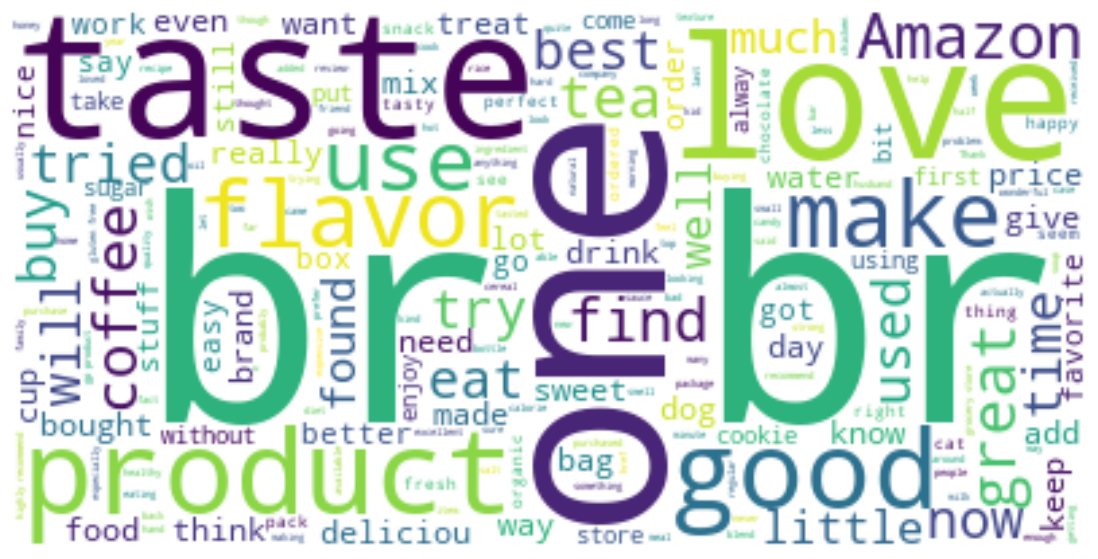

In [19]:
# Select the text of all reviews labeled as "Positive"
pos = df.loc[df.target == "Positive"].Text

# Combine all the positive reviews into a single string, with each review separated by a space
text = " ".join(review for review in pos.astype(str))

# Generate and display the word cloud for the combined positive reviews
generate_wcloud(text)


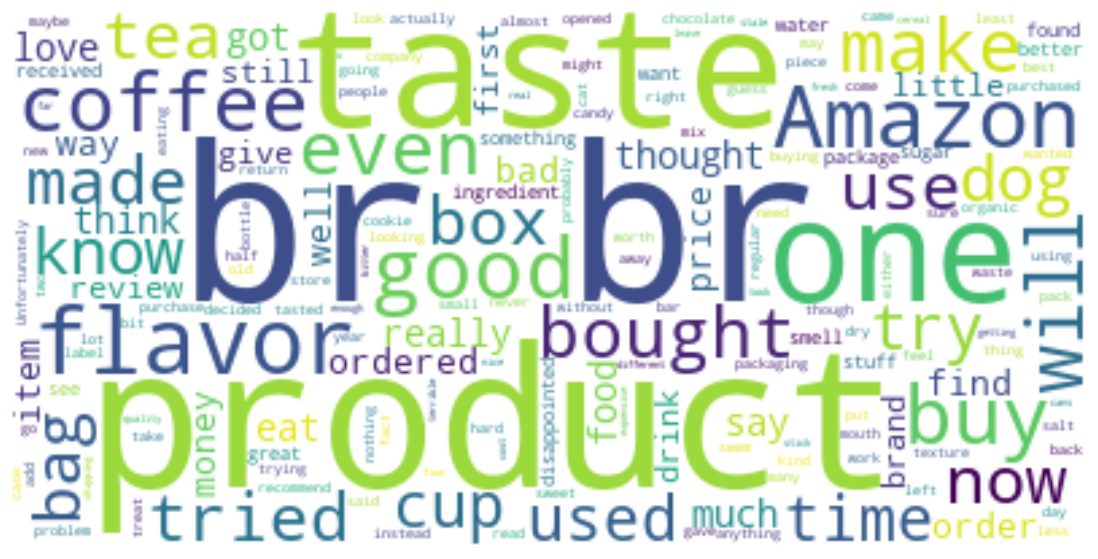

In [20]:
# Select the text of all reviews labeled as "Negative"
neg = df.loc[df.target == "Negative"].Text

# Combine all the negative reviews into a single string, with each review separated by a space
text = " ".join(review for review in neg.astype(str))

# Generate and display the word cloud for the combined negative reviews
generate_wcloud(text)


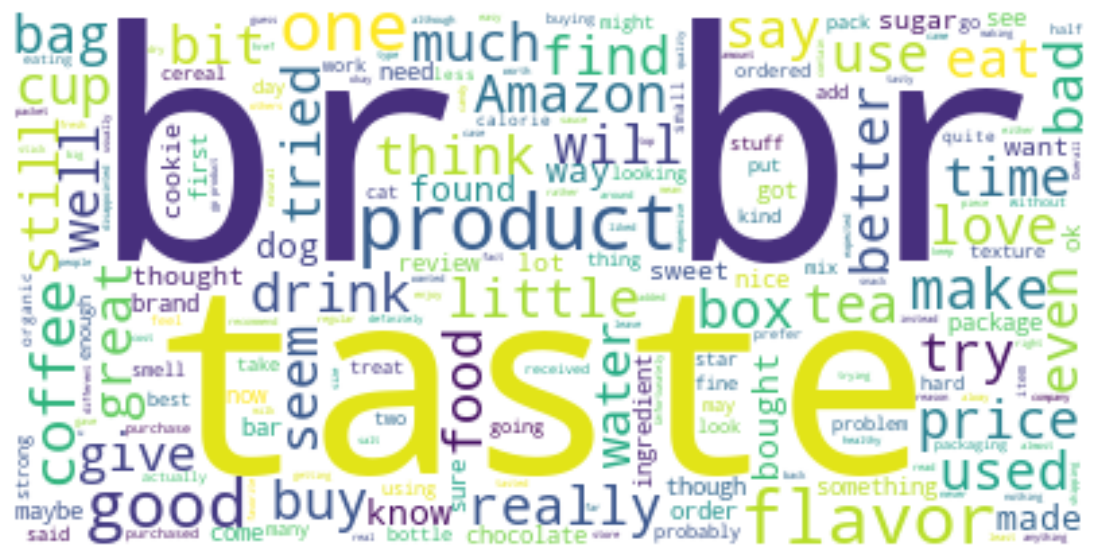

In [21]:
# Select the text of all reviews labeled as "Neutral"
neutral = df.loc[df.target == "Neutral"].Text

# Combine all the neutral reviews into a single string, with each review separated by a space
text = " ".join(review for review in neutral.astype(str))

# Generate and display the word cloud for the combined neutral reviews
generate_wcloud(text)


<div style="background-color: #009688; color: #DAA520; padding: 10px; font-size: 25px; font-weight: bold; text-align: center; border-radius: 5px;">
    Train and Test Split
</div>

In [22]:
# Assign the 'Text' column to the feature variable X
X = df.Text

# Assign the 'target' column to the label variable y
y = df.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1, stratify=y)


In [23]:
X_train.shape, X_test.shape

((103816,), (25954,))

<div style="background-color: #009688; color: #DAA520; padding: 10px; font-size: 25px; font-weight: bold; text-align: center; border-radius: 5px;">
    Vectorization
</div>

In [24]:
# Initialize the CountVectorizer (Bag of Words) with a maximum of 10,000 features
bow_vectorizer = CountVectorizer(max_features=10000)

# Fit the vectorizer to the training data (learn the vocabulary from X_train)
bow_vectorizer.fit(X_train)

# Transform the training data into a bag-of-words representation
bow_X_train = bow_vectorizer.transform(X_train)

# Transform the test data into a bag-of-words representation using the same vocabulary
bow_X_test = bow_vectorizer.transform(X_test)


In [25]:
# Initialize the TfidfVectorizer with a maximum of 10,000 features
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Fit the vectorizer to the training data (learn the vocabulary and IDF from X_train)
tfidf_vectorizer.fit(X_train)

# Transform the training data into a TF-IDF representation
tfidf_X_train = tfidf_vectorizer.transform(X_train)

# Transform the test data into a TF-IDF representation using the same vocabulary
tfidf_X_test = tfidf_vectorizer.transform(X_test)


In [26]:
# Initialize the LabelEncoder
labelEncoder = LabelEncoder()

# Fit the LabelEncoder on the training labels and transform them into numeric values
y_train = labelEncoder.fit_transform(y_train)

# Transform the test labels into numeric values using the same encoding learned from the training set
y_test = labelEncoder.transform(y_test)

# Retrieve the original class labels in the order they were encoded
labels = labelEncoder.classes_.tolist()

# Print the list of labels, showing the mapping from numeric indices to class names
print(labels)  # index -> class


['Negative', 'Neutral', 'Positive']


<div style="background-color: #009688; color: #DAA520; padding: 10px; font-size: 25px; font-weight: bold; text-align: center; border-radius: 5px;">
    Model Training
</div>

In [27]:
def train_and_eval(model, trainX, trainY, testX, testY):
    # Training the model on the training data
    _ = model.fit(trainX, trainY)

    # Making predictions on the training data
    y_preds_train = model.predict(trainX)

    # Making predictions on the test data
    y_preds_test = model.predict(testX)

    # Evaluation and printing results
    print()  # Print a blank line for separation
    print(model)  # Print the model's name or description
    print(f"Train accuracy score : {accuracy_score(trainY, y_preds_train)}")  # Calculate and print the accuracy score on the training data
    print(f"Test accuracy score : {accuracy_score(testY, y_preds_test)}")  # Calculate and print the accuracy score on the test data
    print('\n', 40 * '-')  # Print a separator line for clarity


In [28]:
from sklearn.preprocessing import StandardScaler
# Define a list of regularization strengths to test
C = [0.001, 0.01, 0.1, 1, 10]

# Initialize the scaler (with_mean=False for sparse data)
scaler = StandardScaler(with_mean=False)

# Scale the training and test data
scaled_trainX = scaler.fit_transform(bow_X_train)
scaled_testX = scaler.transform(bow_X_test)

# Loop through each regularization strength
for c in C: 
    # Define the Logistic Regression model with the current regularization strength and alternative solver 'Liblinear'
    log_model = LogisticRegression(C=c, max_iter=2000, random_state=1, solver='liblinear')
    
    # Train the model and evaluate its performance on both the training and test sets
    train_and_eval(model=log_model,
                   trainX=scaled_trainX,
                   trainY=y_train,
                   testX=scaled_testX,
                   testY=y_test)


LogisticRegression(C=0.001, max_iter=2000, random_state=1, solver='liblinear')
Train accuracy score : 0.8022366494567311
Test accuracy score : 0.721006395931263

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=2000, random_state=1, solver='liblinear')
Train accuracy score : 0.8061088849502966
Test accuracy score : 0.7142251676042228

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=2000, random_state=1, solver='liblinear')
Train accuracy score : 0.8066097711335439
Test accuracy score : 0.7127610387608846

 ----------------------------------------

LogisticRegression(C=1, max_iter=2000, random_state=1, solver='liblinear')
Train accuracy score : 0.8066194035601448
Test accuracy score : 0.7122601525776373

 ----------------------------------------

LogisticRegression(C=10, max_iter=2000, random_state=1, solver='liblinear')
Train accuracy score : 0.8066386684133466
Test accuracy score : 0.7121830931648301

 ----------------------

In [30]:
# Naive Bayes classifier:
# List of different smoothing parameters (alpha values) to try
alphas = [0, 0.2, 0.6, 0.8, 1]

# Loop through each alpha value to train and evaluate the model
for a in alphas: 
    # Define the Naive Bayes model with the current alpha value for Laplace smoothing
    nb_model = MultinomialNB(alpha=a)

    # Train the model on the training data and evaluate it on the test data
    train_and_eval(model=nb_model,
                   trainX=bow_X_train,  # Bag-of-Words features for the training set
                   trainY=y_train,      # Sentiment labels for the training set
                   testX=bow_X_test,    # Bag-of-Words features for the test set
                   testY=y_test)        # Sentiment labels for the test set


c:\Users\murta\OneDrive\Desktop\ML&DE\second-semester\Introduction ML\sentiment_analyzis\.venv\lib\site-packages\sklearn\naive_bayes.py:890: RuntimeWarning:

divide by zero encountered in log




MultinomialNB(alpha=0)
Train accuracy score : 0.7173557062495184
Test accuracy score : 0.6976573938506588

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score : 0.7170667334514911
Test accuracy score : 0.6980426909146953

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score : 0.7167007012406565
Test accuracy score : 0.6981582800339061

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score : 0.7165369499884411
Test accuracy score : 0.6980812206210989

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score : 0.7165080527086384
Test accuracy score : 0.6975803344378516

 ----------------------------------------


In [40]:
# Logistic Regression with Tf-Idf 

# List of different regularization strengths (C values) to try
C = [0.001, 0.01, 0.1, 1, 10]

# Loop through each C value to train and evaluate the model
for c in C: 
    # Define the Logistic Regression model with the current C value and other parameters
    log_model = LogisticRegression(C=c, max_iter=2000, random_state=1)
    
    # Train the model on the training data and evaluate it on the test data
    train_and_eval(model=log_model,
                   trainX=tfidf_X_train,  # Tf-Idf features for the training set
                   trainY=y_train,        # Sentiment labels for the training set
                   testX=tfidf_X_test,    # Tf-Idf features for the test set
                   testY=y_test)          # Sentiment labels for the test set



LogisticRegression(C=0.001, max_iter=2000, random_state=1)
Train accuracy score : 0.6337269785004238
Test accuracy score : 0.631578947368421

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=2000, random_state=1)
Train accuracy score : 0.6843839099946059
Test accuracy score : 0.6750404561917238

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=2000, random_state=1)
Train accuracy score : 0.7437967172690144
Test accuracy score : 0.7275179163134777

 ----------------------------------------

LogisticRegression(C=1, max_iter=2000, random_state=1)
Train accuracy score : 0.7826153964706789
Test accuracy score : 0.7401941897202743

 ----------------------------------------

LogisticRegression(C=10, max_iter=2000, random_state=1)
Train accuracy score : 0.8038934268320875
Test accuracy score : 0.7281343916159358

 ----------------------------------------


<div style="background-color: #009688; color: #DAA520; padding: 10px; font-size: 25px; font-weight: bold; text-align: center; border-radius: 5px;">
    Model Evaluation 
</div>

In [41]:
def plot_cm(y_true, y_pred):
    # Create a new figure with a specific size for the confusion matrix plot
    plt.figure(figsize=(6,6))
    
    # Compute the confusion matrix with normalization to show percentages instead of raw counts
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    
    # Plot the confusion matrix as a heatmap with annotations and a blue color map
    sns.heatmap(
        cm, annot=True, cmap='Blues', cbar=False, fmt='.2f',  # fmt='.2f' formats the numbers to two decimal places
        xticklabels=labels, yticklabels=labels)  # Use provided labels for the x and y ticks
    
    # Display the plot
    return plt.show()


In [42]:
# est model : Logistic Regression(C=1) with TfIdf data
bmodel = LogisticRegression(C=1, max_iter=2000, random_state=1)
bmodel.fit(tfidf_X_train, y_train)

LogisticRegression(C=1, max_iter=2000, random_state=1)

In [43]:
# Make predictions on the training data using the trained model
y_preds_train = bmodel.predict(tfidf_X_train)

# Make predictions on the test data using the trained model
y_preds_test = bmodel.predict(tfidf_X_test)


In [45]:
# Print the accuracy score for the training data, formatted to two decimal places
print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train):.2f}")

# Print the accuracy score for the test data, formatted to two decimal places
print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test):.2f}")


Train accuracy score : 0.78
Test accuracy score : 0.74


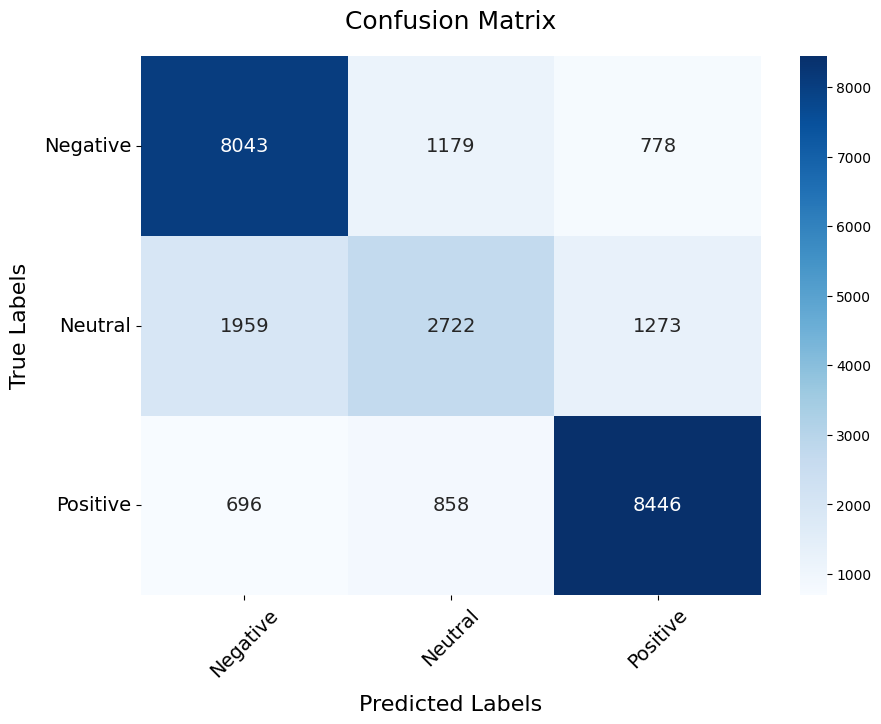

In [46]:
# Function to plot a confusion matrix
def plot_cm(y_true, y_pred, figsize=(10, 7), fontsize=14):
    # Compute the confusion matrix with sorted unique labels from true and predicted values
    labels = sorted(list(set(y_true) | set(y_pred)))
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    # Plotting the confusion matrix as a heatmap
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, annot_kws={"size": fontsize})
    
    # Setting the title and labels for the confusion matrix plot
    ax.set_title('Confusion Matrix', fontsize=fontsize+4, pad=20)
    ax.set_xlabel('Predicted Labels', fontsize=fontsize+2, labelpad=10)
    ax.set_ylabel('True Labels', fontsize=fontsize+2, labelpad=10)
    
    # Adjusting the tick labels for better readability
    ax.set_xticklabels(['Negative', 'Neutral', 'Positive'], rotation=45, fontsize=fontsize)
    ax.set_yticklabels(['Negative', 'Neutral', 'Positive'], rotation=0, fontsize=fontsize)
    
    # Display the plot
    plt.show()

# Example usage: Plot the confusion matrix for the test data predictions
plot_cm(y_test, y_preds_test)


<div style="background-color: #009688; color: #DAA520; padding: 10px; font-size: 25px; font-weight: bold; text-align: center; border-radius: 5px;">
    Deployment
</div>

In [49]:
# Function to predict the sentiment of a single review
def get_sentiment(review):
    # Preprocess the review (e.g., cleaning, tokenization)
    x = preprocessor(review)
    
    # Convert the preprocessed review into a TF-IDF vector
    x = tfidf_vectorizer.transform([x])
    
    # Make a prediction using the trained model and extract the single element
    y = bmodel.predict(x.reshape(1, -1))[0]
    
    # Return the corresponding sentiment label ('Negative', 'Neutral', 'Positive')
    return labels[y]


In [50]:
# positive review
review = "This chips packet is very tasty. I highly recommend this!"
print(f"This is a {get_sentiment(review)} review!")

This is a Positive review!


In [51]:
# negative review
review = "This product is a waste of money. Don't buy this!!"
print(f"This is a {get_sentiment(review)} review!")

This is a Negative review!


In [52]:
# Neutral review example
review = "The chips were okay, nothing special but not bad either."
print(f"This is a {get_sentiment(review)} review!")


This is a Neutral review!
